# Introduction

This data set are example TPC FEE input charge simulated with following setup: 

* Core software update: https://github.com/blackcathj/coresoftware/pull/new/tpc_charge
* Macro for single track: https://github.com/blackcathj/macros/pull/new/tpc_charge_single
* Macro for central AuAu + 200kHz pileup: https://github.com/blackcathj/macros/pull/new/tpc_charge_0-4fm_200kHz_AuAu

Three scenarios are simulated:
* `SingleTrack`: a single 20 GeV pi- track in near central psuedorapidity and max-drift
* `0-4fm_AuAu`: a single central Au+Au collision
* `0-4fm_200kHz_AuAu`: a single central Au+Au collision embedded into 200kHz MB AuAu collision pile ups. This is the typical highest multiplicity environment sPHENIX TPC are expected to operate in

The result are in self-explaintory `JSON` files recording 1-drift window of charge data for each channels. Files are separated with TPC side/sector/layers. 

Here is an example inspection code as following:


In [1]:
%matplotlib inline  

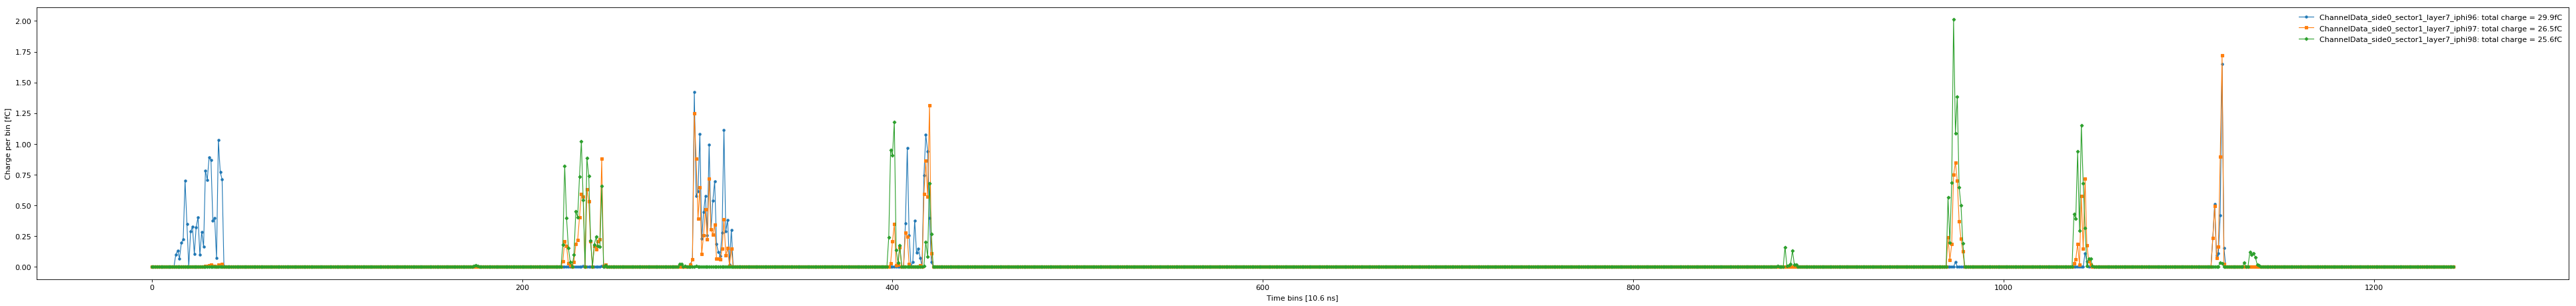

In [15]:
import json
import matplotlib.pyplot as plt
import numpy as np

# inputDataSet = "PadCharge_SingleTrack/PadCharge_side0_sector1_layer7.json"
# inputDataSet = "PadCharge_SingleTrack/PadCharge_side0_sector1_layer40.json"
# inputDataSet = "PadCharge_SingleTrack/PadCharge_side0_sector1_layer47.json"

inputDataSet = "PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer7.json"
# inputDataSet = "PadCharge_0-4fm_AuAu/PadCharge_side0_sector1_layer23.json"


with open(inputDataSet, "r") as read_file:
    dataset = json.load(read_file)

Colors = ['#1f77b4',
          '#ff7f0e',
          '#2ca02c',
          '#d62728',
          '#9467bd',
          '#8c564b',
          '#e377c2',
          '#7f7f7f',
          '#bcbd22',
          '#17becf',
          '#1a55FF']
Markers = ['o' , 's',  'D','p' , 'P']
markiter = iter(Markers);
coleriter = iter(Colors);

fig = plt.figure(figsize=(50, 6), dpi= 80)
ax = fig.add_axes([0.05, 0.15, 0.95, 0.85])
plt.xlabel('Time bins [{} ns]'.format(dataset[list(dataset.keys())[0]]['TimeSpacing_ns']))
plt.ylabel('Charge per bin [fC]')

    
nTimeBins = dataset[list(dataset.keys())[0]]['TimeBins']
TimeBins = np.arange(nTimeBins)

count = 0
for key in dataset.keys():
    count += 1
    if count>3: 
        break
        
#     print(dataset[key]['ChargeTimeBin'])
    ax.plot(TimeBins, 
        np.array(dataset[key]['ChargeTimeBin']) * 1.6e-4, # convert from electrons to fC
        marker=next(markiter), color=next(coleriter), markersize = 3, linewidth = 1,
        label=key + ': total charge = {:.1f}fC'.format(dataset[key]['TotalCharge'] * 1.6e-4 ))
    
plt.legend(loc='best', frameon=False)


plt.savefig(inputDataSet + ".ChargeTimeBin.png", dpi=150)
plt.savefig(inputDataSet + ".ChargeTimeBin.pdf", dpi=150)

In [ ]:
# # %save_html os.path.join(DataDir,"analysis.html")
# import sys
# import os
# from subprocess import check_call

# d, fname = os.path.split(sys.executable)
# # print (d,fname)
# check_call([os.path.join(d,'ipython'), 'nbconvert',
#             '--to', 'html',
#             'ReadME.ipynb',
#             '--output',
#             "ReadME.html"])
# check_call([os.path.join(d,'ipython'), 'nbconvert',
#             '--to', 'pdf',
#             'RateAnalysis.ipynb',
#             '--output',
#             "ReadME.pdf"])

# Scratch

In [ ]:
print(dataset[list(dataset.keys())[0]]['TimeBins'])

In [ ]:
[range(1:nTimeBins)]